In [3]:
import pandas as  pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import datetime 
%matplotlib inline

## Read raw data file

In [4]:
raw_data = 'data.csv'
df = pd.read_csv(raw_data,encoding = 'ISO-8859-1')
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
# format date
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M',errors='coerce')
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
# lower description to analyze easier
df['description'] = df.description.str.lower()
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


### Check missing value for each column 

In [6]:
# Check each column
df.isnull().sum()

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
cust_id         135080
country              0
dtype: int64

In [8]:
# Check out column
df[df.isnull().any(axis=1)]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,decorative rose bathroom bottle,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,decorative cats bathroom bottle,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,polkadot rain hat,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,rain poncho retrospot,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,jumbo bag red retrospot,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,jumbo bag baroque black white,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,ladies & gentlemen metal sign,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,s/4 cacti candles,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [9]:
# Drop NaN
df_new = df.dropna()
# check
df_new.isnull().sum()

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [12]:
# Change datatype of cust_id
df_new.cust_id = df_new.cust_id.astype(int)
df_new

C:\Users\congt\AppData\Local\Temp/ipykernel_8536/1471815785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.cust_id = df_new.cust_id.astype(int)


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France


### Check quantity >0 ? If there are some quantities <0, filter quantity values >0.

In [11]:
df_new[df_new.quantity<=0]

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,zinc t-light holder stars small,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,hanging heart jar t-light holder,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [13]:
df_new = df_new[df_new.quantity>0]
df_new.shape

(397924, 8)

### Add column amount_spent = quantity * unit_price

In [14]:
#Add amount_spent
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']
# Rearrange
df_new = df_new[['invoice_num','invoice_date','stock_code','description','unit_price','quantity','amount_spent','cust_id','country']]
df_new

C:\Users\congt\AppData\Local\Temp/ipykernel_8536/3292282681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']


,invoice_num,invoice_date,stock_code,description,unit_price,quantity,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,2.55,6,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,3.39,6,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,2.75,8,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,3.39,6,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,3.39,6,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,22613,pack of 20 spaceboy napkins,0.85,12,10.20,12680,France
541905,581587,2011-12-09 12:50:00,22899,children's apron dolly girl,2.10,6,12.60,12680,France
541906,581587,2011-12-09 12:50:00,23254,childrens cutlery dolly girl,4.15,4,16.60,12680,France
541907,581587,2011-12-09 12:50:00,23255,childrens cutlery circus parade,4.15,4,16.60,12680,France


### Add column year, month, day, hour

In [15]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc = 3, column = 'month', value = df_new.invoice_date.dt.month)
df_new.insert(loc = 4, column = 'day', value = (df_new.invoice_date.dt.dayofweek) + 1)
df_new.insert(loc = 5, column = 'hour', value = df_new.invoice_date.dt.hour)
df_new

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,unit_price,quantity,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,2.55,6,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,3.39,6,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,2.75,8,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,3.39,6,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,3.39,6,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,201112,12,5,12,22613,pack of 20 spaceboy napkins,0.85,12,10.20,12680,France
541905,581587,2011-12-09 12:50:00,201112,12,5,12,22899,children's apron dolly girl,2.10,6,12.60,12680,France
541906,581587,2011-12-09 12:50:00,201112,12,5,12,23254,childrens cutlery dolly girl,4.15,4,16.60,12680,France
541907,581587,2011-12-09 12:50:00,201112,12,5,12,23255,childrens cutlery circus parade,4.15,4,16.60,12680,France


## Exploratory Data Analysis 

### How many products bought by customers ?

In [17]:
# Group by customer,country and count products (invoice_num)
invoices_cus = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()
invoices_cus

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4342,18280,United Kingdom,10
4343,18281,United Kingdom,7
4344,18282,United Kingdom,12
4345,18283,United Kingdom,756


In [18]:
# statistics basic values:
invoices_cus.invoice_num.describe().round(2)

count    4347.00
mean       91.54
std       228.60
min         1.00
25%        17.00
50%        41.00
75%       100.00
max      7847.00
Name: invoice_num, dtype: float64

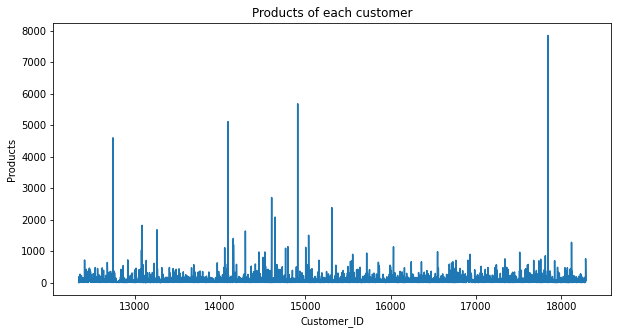

In [26]:
# draw bar chart about how many product bought by customers
plt.subplots(figsize = (10,5))
plt.plot(invoices_cus.cust_id,invoices_cus.invoice_num)
plt.xlabel('Customer_ID')
plt.ylabel('Products')
plt.title('Products of each customer')

plt.show()

#### Top 5 customers buy the highest numbers of products

In [24]:
print('Top 5 customers buy the highest numbers of products:')
invoices_cus.sort_values(by = 'invoice_num',ascending = False).head()

Top 5 customers buy the highest numbers of products:


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


### How much people spent on buying products:

In [21]:
# amount_spent
spent_cus = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
spent_cus

,cust_id,country,amount_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


In [22]:
# statistics values:
spent_cus.amount_spent.describe().round(2)

count      4347.00
mean       2050.01
std        8980.10
min           0.00
25%         307.43
50%         671.96
75%        1661.20
max      280206.02
Name: amount_spent, dtype: float64

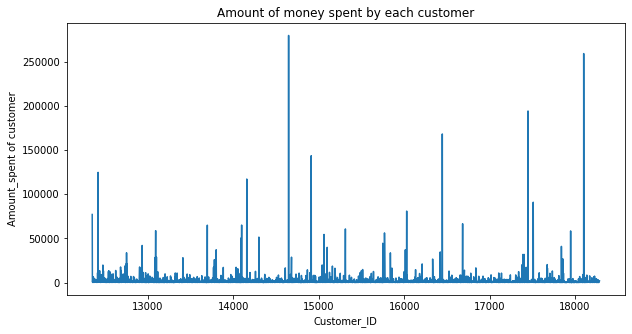

In [27]:
# Draw bar chart
plt.subplots(figsize = (10,5))
plt.plot(spent_cus.cust_id,spent_cus.amount_spent)
plt.xlabel('Customer_ID')
plt.ylabel('Amount_spent of customer')
plt.title('Amount of money spent by each customer')

plt.show()

#### Top 5 customers have the highest amount_spent

In [21]:
spent_cus.sort_values(by = 'amount_spent',ascending = False).head()

,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


- Based on graph and data above, we can find out potential customers, then  we can increase promotion program to approach more customer in ecommerce market.
- Moreover, we can propose high quality products with reasonable price for loyal customer.
- We should usually propose necessary products with promotion price.

## Analyze number of invoices with datetime. How many invoices made by customers in month,day ?

### Number of invoices in month

In [28]:
# Number of invoices in month
invoice_month = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index()
months = df_new['year_month'].unique()
months = months.astype(str)
print(invoice_month)
print(months)

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64
['201012' '201101' '201102' '201103' '201104' '201105' '201106' '201107'
 '201108' '201109' '201110' '201111' '201112']


In [29]:
invoice_month.describe().round(2)

count      13.00
mean     1425.85
std       484.06
min       778.00
25%      1149.00
50%      1331.00
75%      1555.00
max      2658.00
Name: year_month, dtype: float64

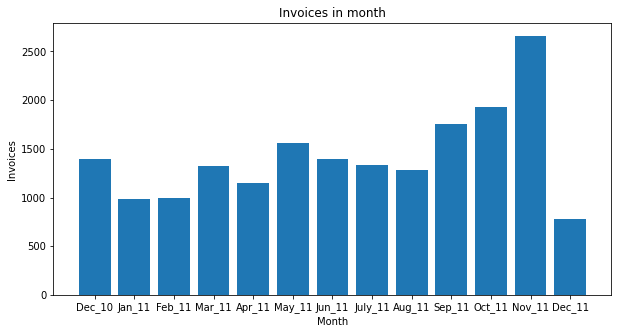

In [31]:
# Draw frequency of orders in month
plt.subplots(figsize = (10,5))
plt.bar(months,invoice_month)
plt.xlabel('Month')
plt.ylabel('Invoices')
plt.title('Invoices in month')
plt.xticks(ticks = months, labels = ['Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'])
plt.show()

- Number of invoices variates mostly in 1000-1500 invoices/month except month 11/2011. In month 11/2011, number of invoices is 2500, equal to nearly 2 times compared to remain months. I guess because there is Black Friday in November.
- I propose company should increase number of employees to meet the need of buying products in this month.

### Number of invoices in week day

In [33]:
# Number of invoices in week day
invoice_day = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()
days = sorted(df_new['day'].unique())
print(invoice_day)
print(days)

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64
[1, 2, 3, 4, 5, 7]


In [26]:
invoice_day.describe().round(2)

count       6.00
mean     3089.33
std       632.19
min      2169.00
25%      2839.00
50%      3024.00
75%      3387.50
max      4033.00
Name: day, dtype: float64

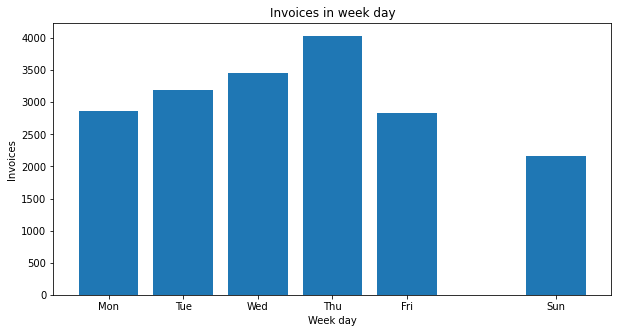

In [35]:
# Draw frequency of orders in weekday
plt.subplots(figsize = (10,5))
plt.bar(days,invoice_day)
plt.xlabel('Week day')
plt.ylabel('Invoices')
plt.title('Invoices in week day')
plt.xticks(ticks = days, labels = ['Mon','Tue','Wed','Thu','Fri','Sun'])
plt.show()

- Mean of invoices in days in week is 3000. Thursday has the highest of number of invoices (4033 invoices).
- Especially, Saturday has no invoices, maybe this company off in Sartuday. I propose this company can work in Saturday or reduce ads campaingn for customers in Saturday to reduce money to maintain appstore.

## Analyze in unit_price (unit_price)

In [37]:
df_new.unit_price.describe().round(2)
hist_95 = np.quantile(df_new.unit_price,0.95)
print(df_new.unit_price.describe().round(2))
print('95% unit_price in range from 0 to',hist_95)

count    397924.00
mean          3.12
std          22.10
min           0.00
25%           1.25
50%           1.95
75%           3.75
max        8142.75
Name: unit_price, dtype: float64
95% unit_price in range from 0 to 8.5


(array([3.97898e+05, 1.30000e+01, 7.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.   ,  814.275, 1628.55 , 2442.825, 3257.1  , 4071.375,
        4885.65 , 5699.925, 6514.2  , 7328.475, 8142.75 ]),
 <BarContainer object of 10 artists>)

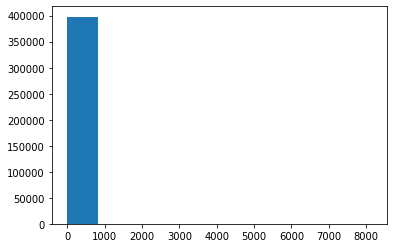

In [38]:
plt.hist(df_new['unit_price'])

- Because there are some outliers too big, compare to most of unit_price is around $3. So I use hist_95 to count 95% all of values to draw to visualize historgram about number of unit_price

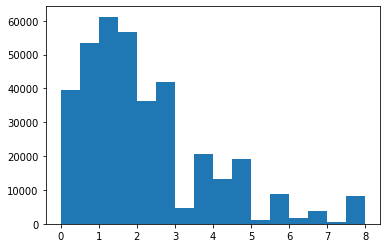

In [39]:
# We draw from 0 to hist_95(8.5)
plt.hist(df_new['unit_price'],bins = np.arange(0,hist_95,0.5))
plt.show()

- Unit_price in range 0.5 to 2 take the highest percentage of all unit_price values

### Count free times in month ( unit_price = 0)

In [40]:
df_free = df_new[df_new.unit_price == 0]
print(df_free.shape)
df_free

(40, 13)


,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,unit_price,quantity,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,0.0,1,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,0.0,4,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,0.0,10,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,0.0,24,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,0.0,24,0.0,13081,United Kingdom
56674,541109,2011-01-13 15:10:00,201101,1,4,15,22168,organiser wood antique white,0.0,1,0.0,15107,United Kingdom
86789,543599,2011-02-10 13:08:00,201102,2,4,13,84535B,fairy cakes notebook a6 size,0.0,16,0.0,17560,United Kingdom
130188,547417,2011-03-23 10:25:00,201103,3,3,10,22062,ceramic bowl with love heart design,0.0,36,0.0,13239,United Kingdom
139453,548318,2011-03-30 12:45:00,201103,3,3,12,22055,mini cake stand hanging strawbery,0.0,5,0.0,13113,United Kingdom
145208,548871,2011-04-04 14:42:00,201104,4,1,14,22162,heart garland rustic padded,0.0,2,0.0,14410,United Kingdom


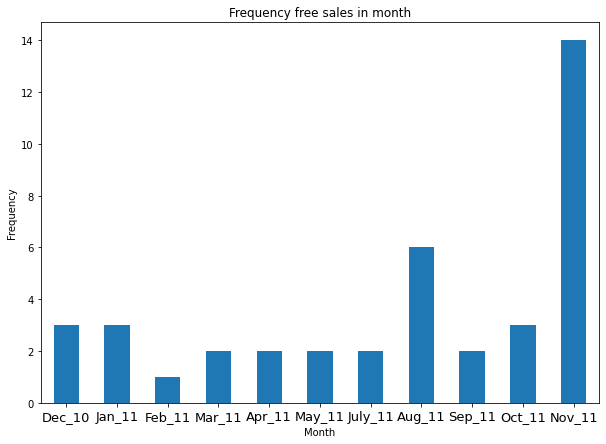

In [41]:
hist_fre = df_free.groupby(by='year_month')['unit_price'].count().sort_index()
ax = hist_fre.plot.bar(figsize=(10,7))
ax.set_title('Frequency free sales in month')
ax.set_ylabel('Frequency')
ax.set_xlabel('Month')
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

- Count of free proucts is highest in Nov-2011. This is true because there are the most number of invoices in Nov/2011 based on graph above

### Analyze in country (country)

#### How many products bought in contries?


In [42]:
country_invoice = df_new.groupby(by = 'country')['invoice_num'].count().sort_values()
country_invoice

country
Saudi Arabia                 9
Bahrain                     17
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Unspecified                244
Israel                     248
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1462
Switzerland               1842
Belgium                   2031
Netherlands               2363


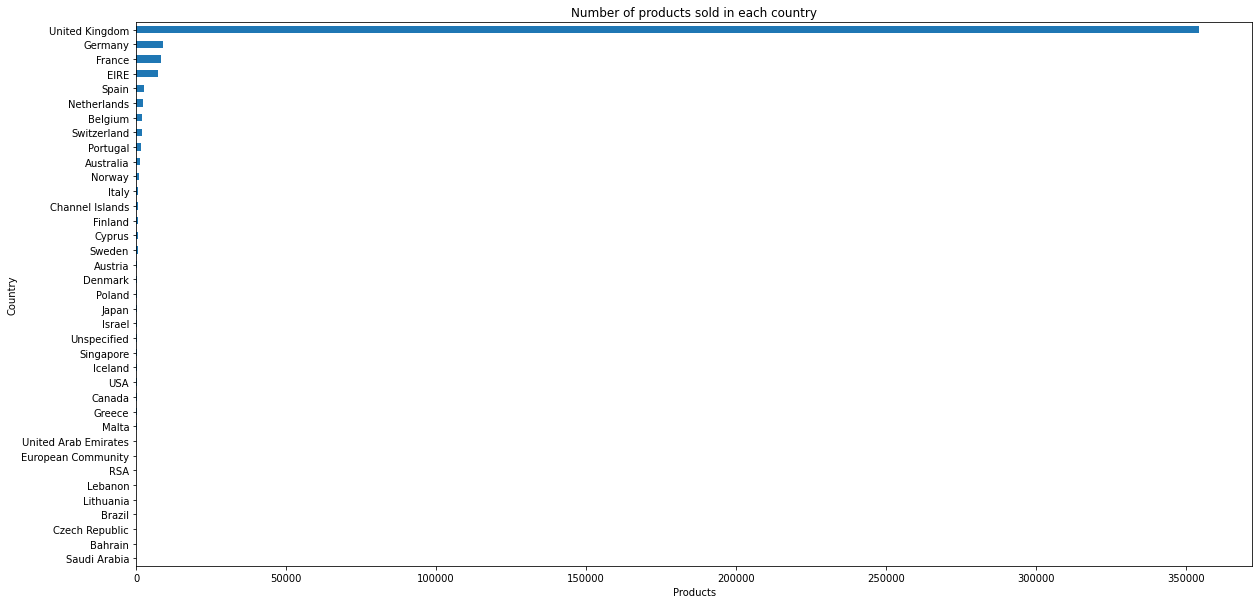

In [43]:
ax = country_invoice.plot.barh(figsize=(20,10))
ax.set_title('Number of products sold in each country')
ax.set_ylabel('Country')
ax.set_xlabel('Products')
plt.show()

- Number of products sold in UK is $350000, 35 times compared to remain countries

In [45]:
# Because products sold in UK is too large, so we should remove UK from table to analyze remain countries easier
df_new_not_UK = df_new[df_new.country != 'United Kingdom']
# df_new_not_UK
country_invoice_not_UK = df_new_not_UK.groupby(by = 'country')['invoice_num'].count().sort_values()
country_invoice_not_UK 

country
Saudi Arabia               9
Bahrain                   17
Czech Republic            25
Brazil                    32
Lithuania                 35
Lebanon                   45
RSA                       58
European Community        60
United Arab Emirates      68
Malta                    112
Greece                   145
Canada                   151
USA                      179
Iceland                  182
Singapore                222
Unspecified              244
Israel                   248
Japan                    321
Poland                   330
Denmark                  380
Austria                  398
Sweden                   451
Cyprus                   614
Finland                  685
Channel Islands          748
Italy                    758
Norway                  1072
Australia               1185
Portugal                1462
Switzerland             1842
Belgium                 2031
Netherlands             2363
Spain                   2485
EIRE                    7238
France

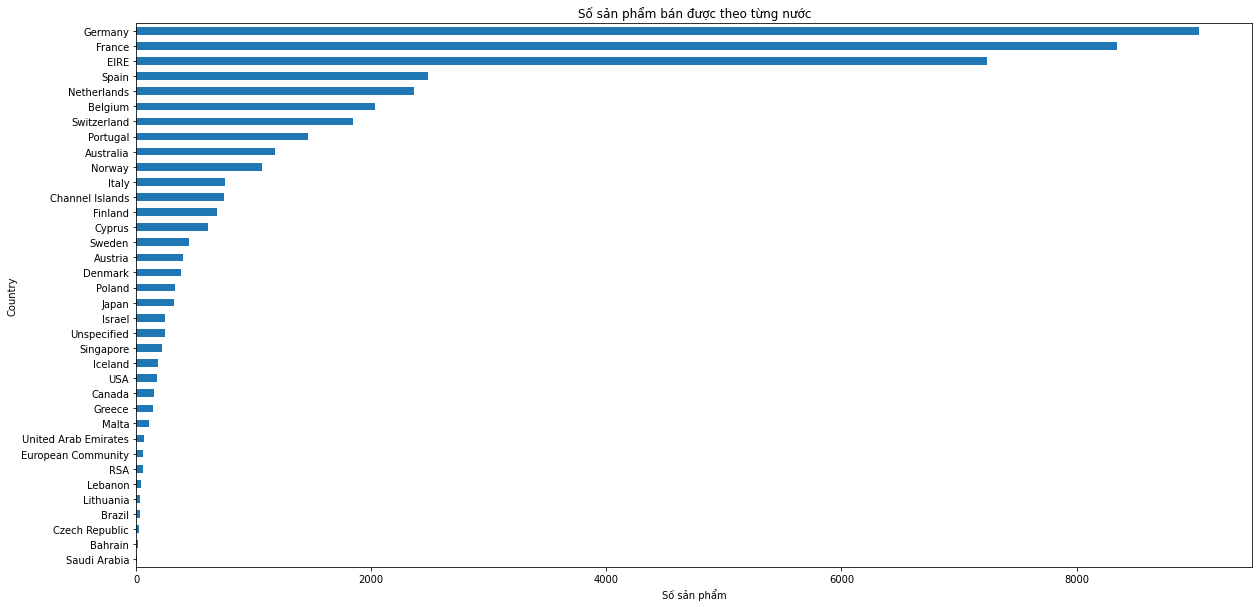

In [36]:
ax = country_invoice_not_UK.plot.barh(figsize=(20,10))
ax.set_title('Products sold in each country except UK')
ax.set_ylabel('Country')
ax.set_xlabel('Products')
plt.show()

- Some countries in Europe like Germany, France, EIRE bought more invoices than remain countries.

#### How much did each country spend on ?

In [47]:
country_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
country_spent

country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

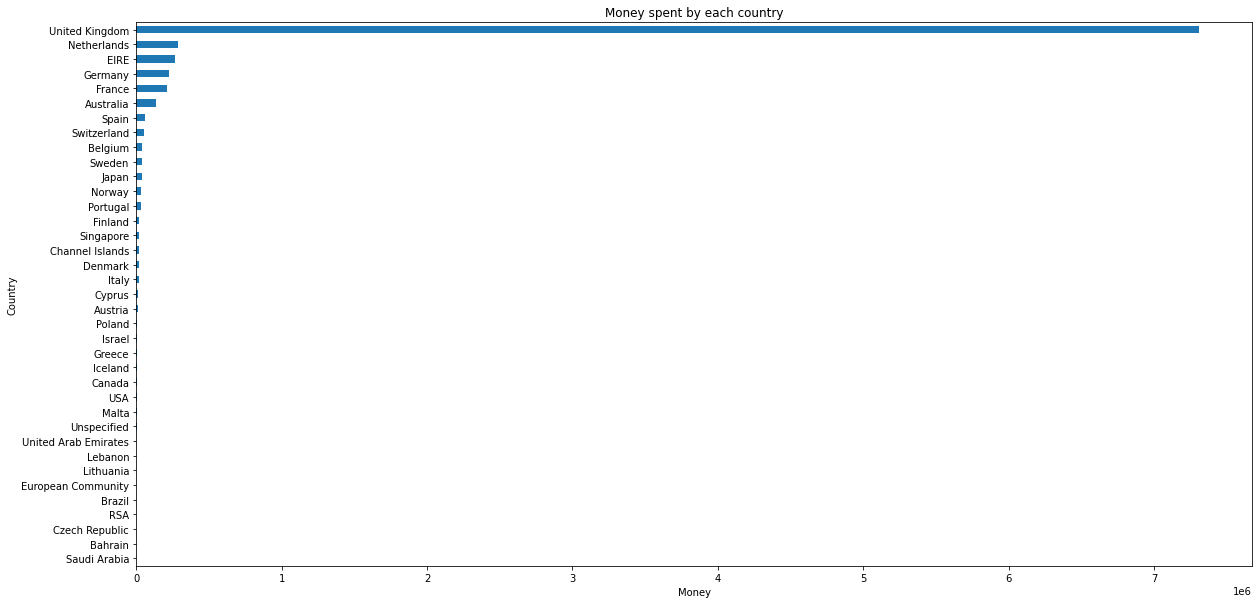

In [48]:
ax = country_spent.plot.barh(figsize=(20,10))
ax.set_title('Money spent by each country')
ax.set_ylabel('Country')
ax.set_xlabel('Money')
plt.show()

- UK spent the most money with nearly $7mil.

In [49]:
# Because Uk spent too much money in products, so we should remove UK from table to analyze remain countries
df_new_not_UK = df_new[df_new.country != 'United Kingdom']
# df_new_not_UK
country_spent_not_UK = df_new_not_UK.groupby(by = 'country')['amount_spent'].sum().sort_values()
country_spent_not_UK 

country
Saudi Arabia               145.92
Bahrain                    548.40
Czech Republic             826.74
RSA                       1002.31
Brazil                    1143.60
European Community        1300.25
Lithuania                 1661.06
Lebanon                   1693.88
United Arab Emirates      1902.28
Unspecified               2667.07
Malta                     2725.59
USA                       3580.39
Canada                    3666.38
Iceland                   4310.00
Greece                    4760.52
Israel                    7221.69
Poland                    7334.65
Austria                  10198.68
Cyprus                   13590.38
Italy                    17483.24
Denmark                  18955.34
Channel Islands          20450.44
Singapore                21279.29
Finland                  22546.08
Portugal                 33439.89
Norway                   36165.44
Japan                    37416.37
Sweden                   38378.33
Belgium                  41196.34
Switze

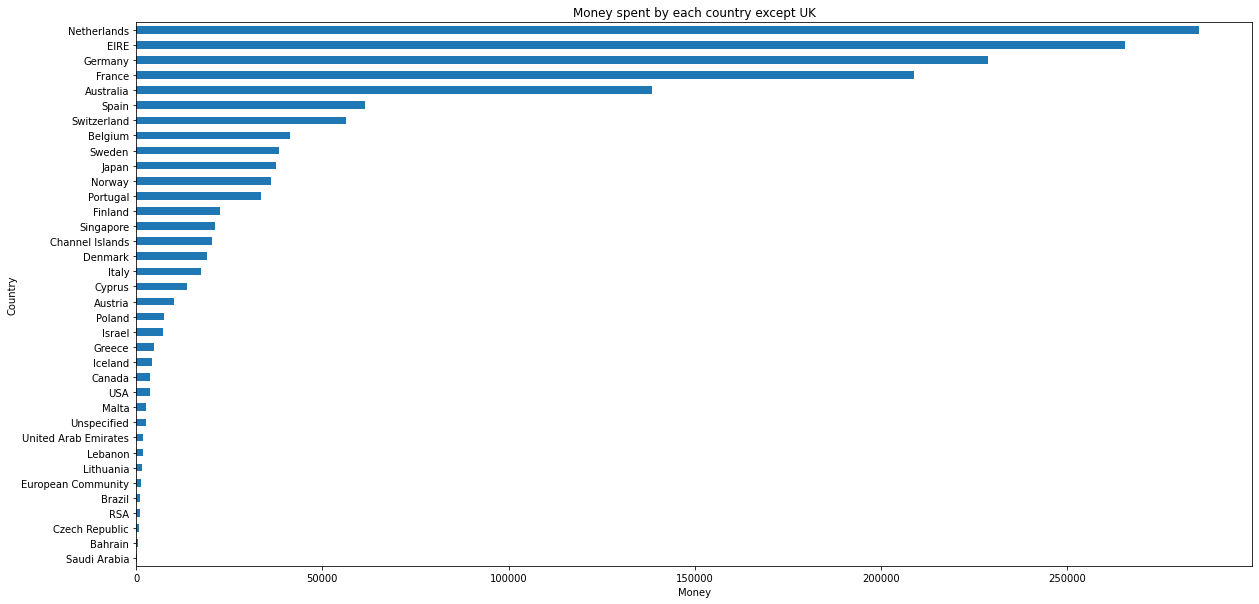

In [50]:
ax = country_spent_not_UK.plot.barh(figsize=(20,10))
ax.set_title('Money spent by each country except UK')
ax.set_ylabel('Country')
ax.set_xlabel('Money')
plt.show()

- Although Netherland has less invoices than Germany, France and EIRE but it spent more money than those countries.